## EDA

Данный ноутбук сделан для того, чтобы посмотреть на несколько семплов из собранного датасета и некоторые статистики по изображениям.

In [ ]:
import sys
import numpy as np
from pathlib import Path

sys.path.append("../")

Посмотрим примеры с тренировочной выборки:

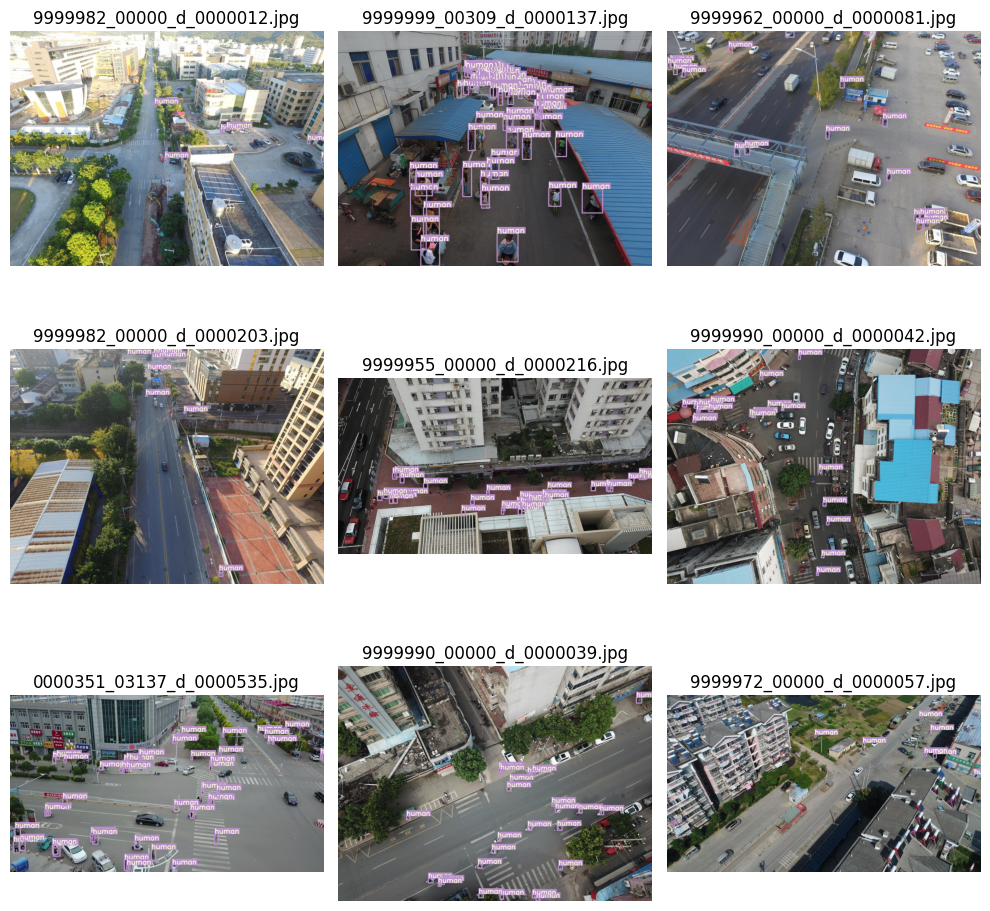

In [3]:
from src.visualization.draw_annotation import show_random_images

train_folder = Path("../datasets/VisDrone/VisDrone2019-DET-train/")

show_random_images(train_folder, ["human"], (3, 3))

Для подбора размера ресайза при работе с детекцией маленьких объектов, стоит узнать статискику по размерам изображений:

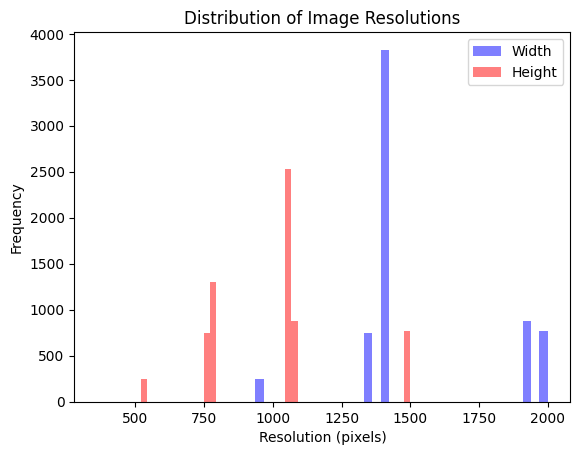

Median width: 1400.0 height: 1050.0


In [6]:
from src.visualization.statistics import width_height_stats

w, h = width_height_stats(train_folder)
print(f"Median width: {np.median(w)} height: {np.median(h)}")

После того, как в VisDrone остались только два класса, могло появиться много сэмплов без аннотаций в которых класс `Human` отсутствует. Посмотрим сколько таких.

In [17]:
import os

num_images = len([name for name in os.listdir(train_folder / "images")])
num_labels = len([name for name in os.listdir(train_folder / "labels")])

print(num_images, num_labels, 1 - num_labels / num_images)

6471 5684 0.12161953330242625


Пустых сэмплов порядка 12%. Это немного больше чем хотелось бы, можно в дальнейшем попробовать улучшить качество модели оставив 0-10% процетнов.